## Ads Click Through Rate

Ads Click Through Rate measures the effectiveness of an advertising campaign by calculating the ratio of clicks to impressions. It provides insights into how engaging and relevant an ad is to the target audience.

The dataset provided contains information related to Ads CTR for a specific online advertising campaign. It consists of the following columns:

- Date: The date on which the data was recorded.
- Clicks: The number of times users clicked on the ads.
- Impressions: The total number of times the ads were displayed to users.

Dataset Link :- https://statso.io/wp-content/uploads/2023/10/ctr.csv

### Task

- Analyze the distribution of Clicks and Impressions over time.
- Calculate and visualize the Click-Through Rate (CTR) trend.
- Identify any patterns or trends in CTR based on day-of-week and other features.
- Create relevant features for CTR analysis.
- Build a forecasting model to predict future CTR values.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\ctr.csv")

In [6]:
df.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Clicks       365 non-null    int64 
 2   Impressions  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [8]:
df.isnull().sum()

Date           0
Clicks         0
Impressions    0
dtype: int64

In [9]:
df.describe()

,Clicks,Impressions
count,365.000000,365.000000
mean,2070.372603,49612.717808
std,652.136850,9894.719622
min,816.000000,26489.000000
25%,1604.000000,41999.000000
50%,1948.000000,48428.000000
75%,2553.000000,57326.000000
max,3720.000000,72052.000000


In [14]:
df.duplicated().sum()

0

Let’s start by converting the Date column in the DataFrame from a string format to a datetime format and then setting it as the index of the DataFrame:

In [18]:
# Data Prepartion 
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

df.set_index('Date', inplace = True)

In [19]:
df.head()

,Clicks,Impressions
Date,,
2022-10-19,2851,58598
2022-10-20,2707,57628
2022-10-21,2246,50135
2022-10-22,1686,40608
2022-10-23,1808,41999


Now, let’s visualize the clicks and impressions over time:

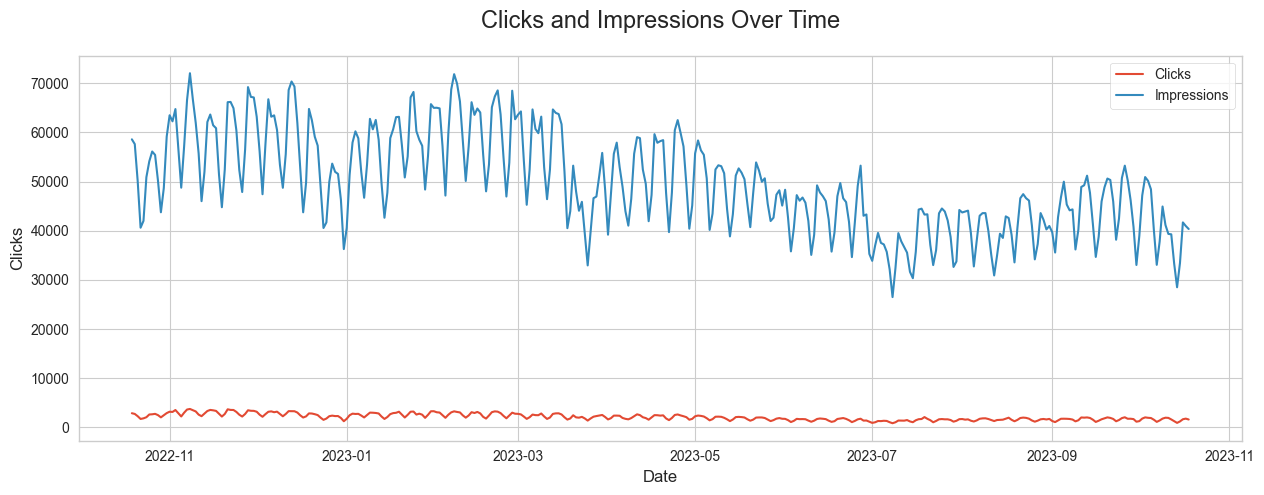

In [27]:
# Visualize Clicks and Impressions

plt.figure( figsize = (15,5))

columns = ["Clicks", "Impressions"]

for col in columns:
    sns.lineplot( x = df.index , y = df[col], label = col)
    
plt.title('Clicks and Impressions Over Time', size = 17, pad = 20)
plt.show()

Now, let’s have a look at the relationship between clicks and impressions:

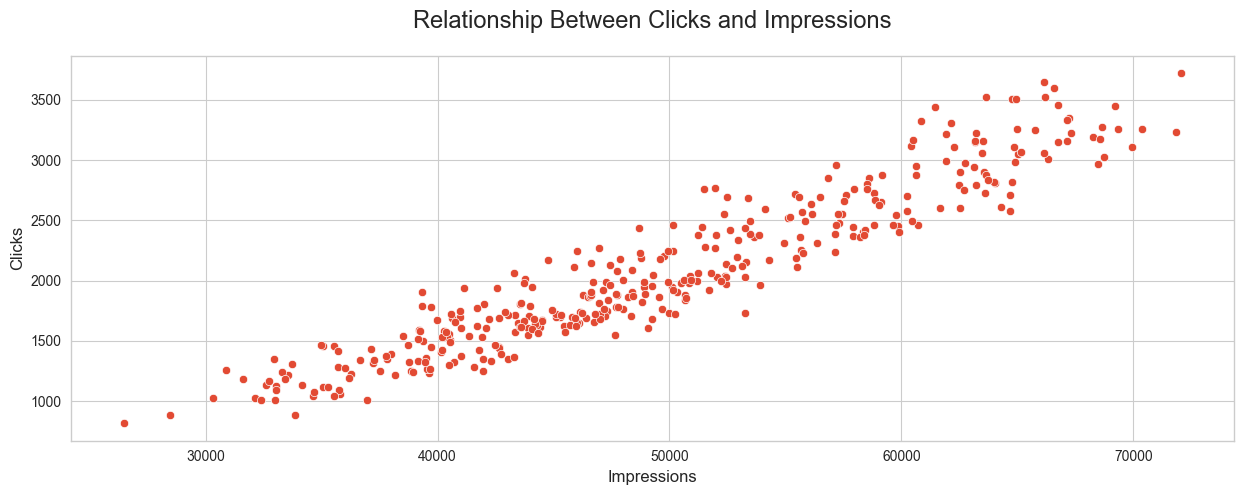

In [33]:
plt.figure( figsize = (15,5))

sns.scatterplot( data = df , y = "Clicks", x = "Impressions")

plt.title("Relationship Between Clicks and Impressions", size = 17, pad = 20)
plt.show()

So, the relationship between clicks and impressions is linear. It means higher ad impressions result in higher ad clicks. Now, let’s calculate and visualize CTR over time:

In [40]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

df['CTR'] = round(df['CTR'], ndigits = 1)

In [41]:
df.head(2)

,Clicks,Impressions,CTR
Date,,,
2022-10-19,2851,58598,4.9
2022-10-20,2707,57628,4.7


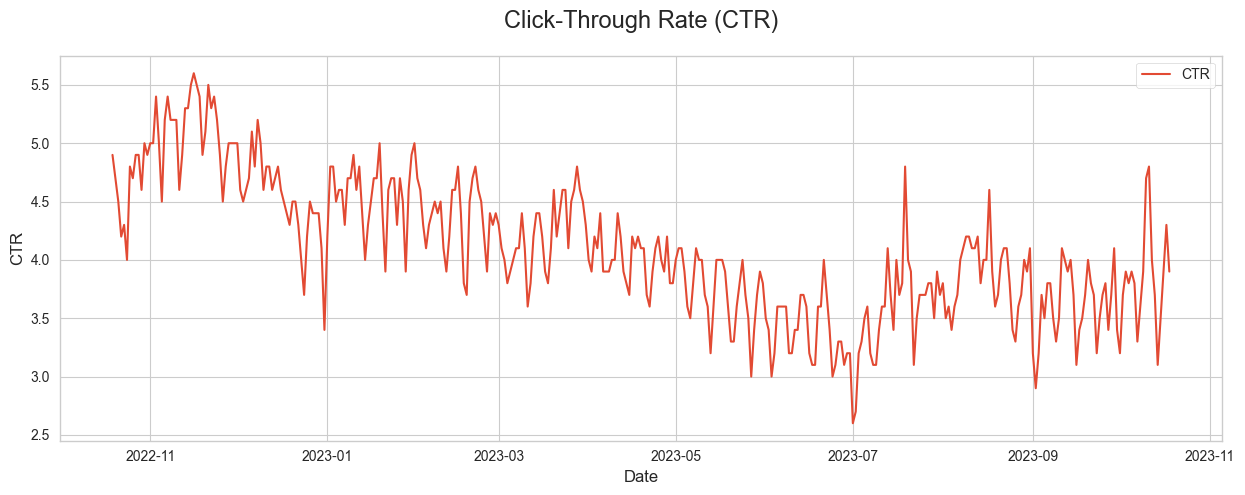

In [43]:
# visualizing CTR

plt.figure( figsize = (15,5))

sns.lineplot( x = df.index , y = df['CTR'], label = "CTR")
    
plt.title('Click-Through Rate (CTR)', size = 17, pad = 20)
plt.show()

Now, let’s have a look at the average CTR by day of the week:

In [68]:
df['DayOfWeek'] = df.index.dayofweek

In [69]:
day_map = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [70]:
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)
df.head(3)

,Clicks,Impressions,CTR,DayOfWeek
Date,,,,
2022-10-19,2851,58598,4.9,Wed
2022-10-20,2707,57628,4.7,Thu
2022-10-21,2246,50135,4.5,Fri


In [71]:
# Calculate average CTR for weekdays
DOW_CTR = df.groupby("DayOfWeek")["CTR"].mean().reset_index()

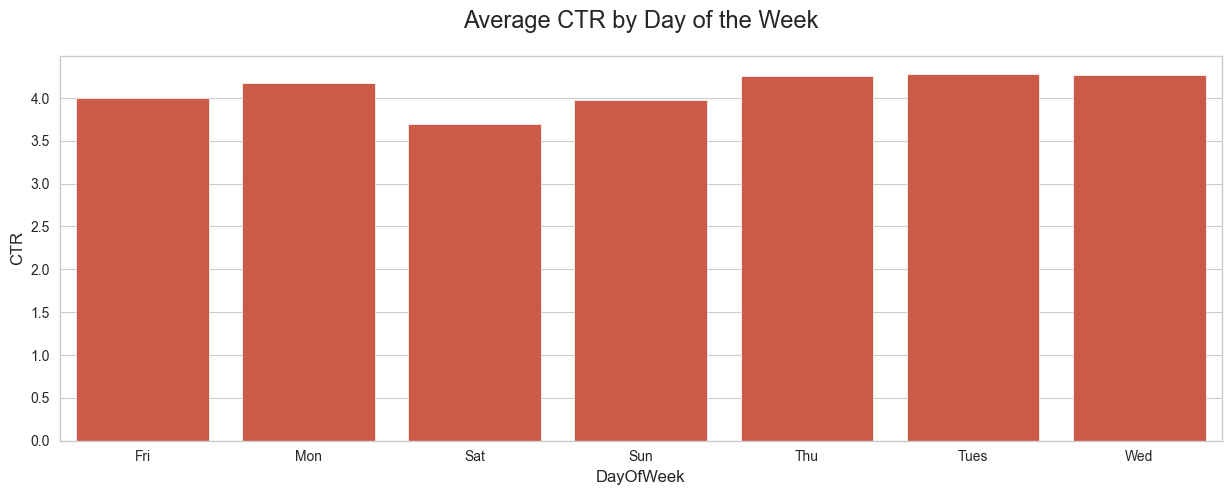

In [72]:
plt.figure( figsize = (15,5))

sns.barplot( DOW_CTR, x = 'DayOfWeek', y = 'CTR')

plt.title('Average CTR by Day of the Week', size = 17, pad = 20)
plt.show()

Now, let’s compare the CTR on weekdays and weekends:

In [73]:
# Creating a new column 'DayCategory' to categorize weekdays and weekends
df["DayCategory"] = df['DayOfWeek'].apply( lambda x: "Weekend" if x == "Sun" else "Weekday")

In [77]:
# Calculate average CTR for weekdays and weekends
ctr_by_day_category = df.groupby('DayCategory')['CTR'].mean().reset_index()

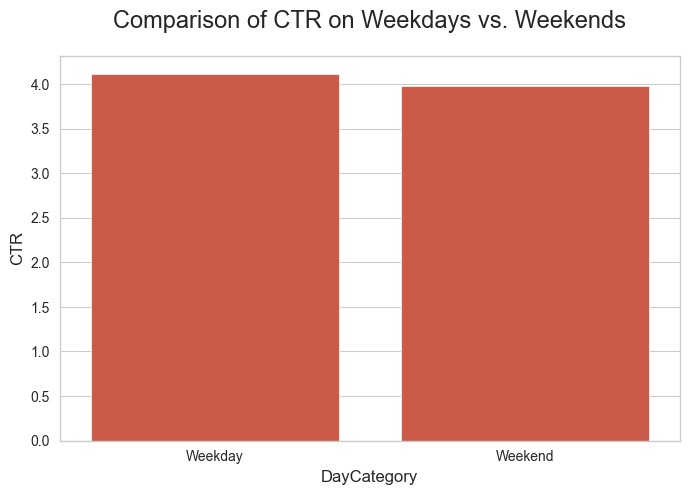

In [81]:
plt.figure( figsize = (8,5))

sns.barplot( ctr_by_day_category , x = 'DayCategory', y = 'CTR')

plt.title('Comparison of CTR on Weekdays vs. Weekends', size = 17, pad = 20)
plt.show()

Now, let’s compare the impressions and clicks on weekdays and weekends:

In [85]:
# Group the data by 'DayCategory' and calculate the sum of Clicks and Impressions for each category
grouped_data = df.groupby('DayCategory')[['Clicks', 'Impressions']].sum().reset_index()

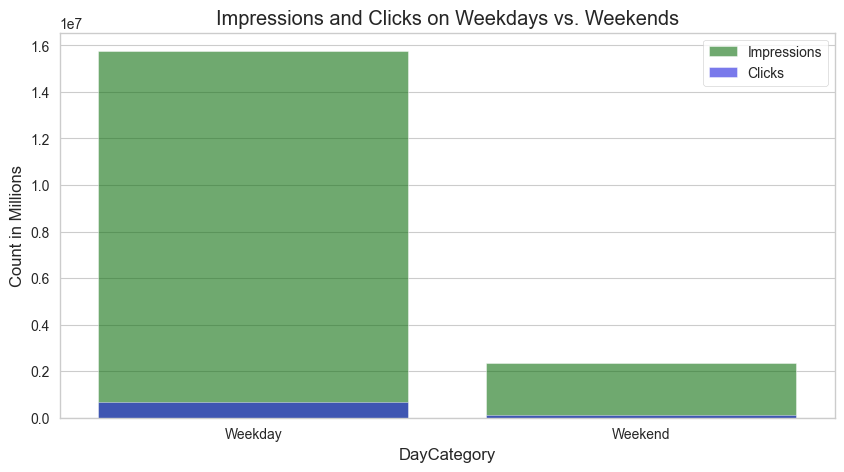

In [93]:
fig , ax = plt.subplots( figsize = (10,5))

sns.barplot(grouped_data, x = 'DayCategory', y = 'Impressions', color = "green", alpha = 0.6, label = 'Impressions')

sns.barplot(grouped_data, x = 'DayCategory', y = 'Clicks', color = "blue", alpha = 0.6, label = 'Clicks')

plt.ylabel("Count in Millions")
plt.title('Impressions and Clicks on Weekdays vs. Weekends')
plt.show()

## Ads CTR Forecasting

Now, let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model:

In [94]:
df.reset_index(inplace = True)

In [105]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [104]:
# Resetting Index
time_series = df.set_index('Date')['CTR']

### ADF Test For Checking Stationary

In [109]:
result = adfuller(time_series)

print('ADF Statistic:', result[0]) 
print('p-value:', result[1]) 
print('Critical Values:', result[4]) 

# Interpretation 
if result[1] < 0.05:
    print("The series is stationary") 
else: 
    print("The series is not stationary")

ADF Statistic: -1.7464077140915277
p-value: 0.40737423912818876
Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}
The series is not stationary


### Seasonal Decomposition 

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decomp = seasonal_decompose( time_series , model = "multiplicative" )

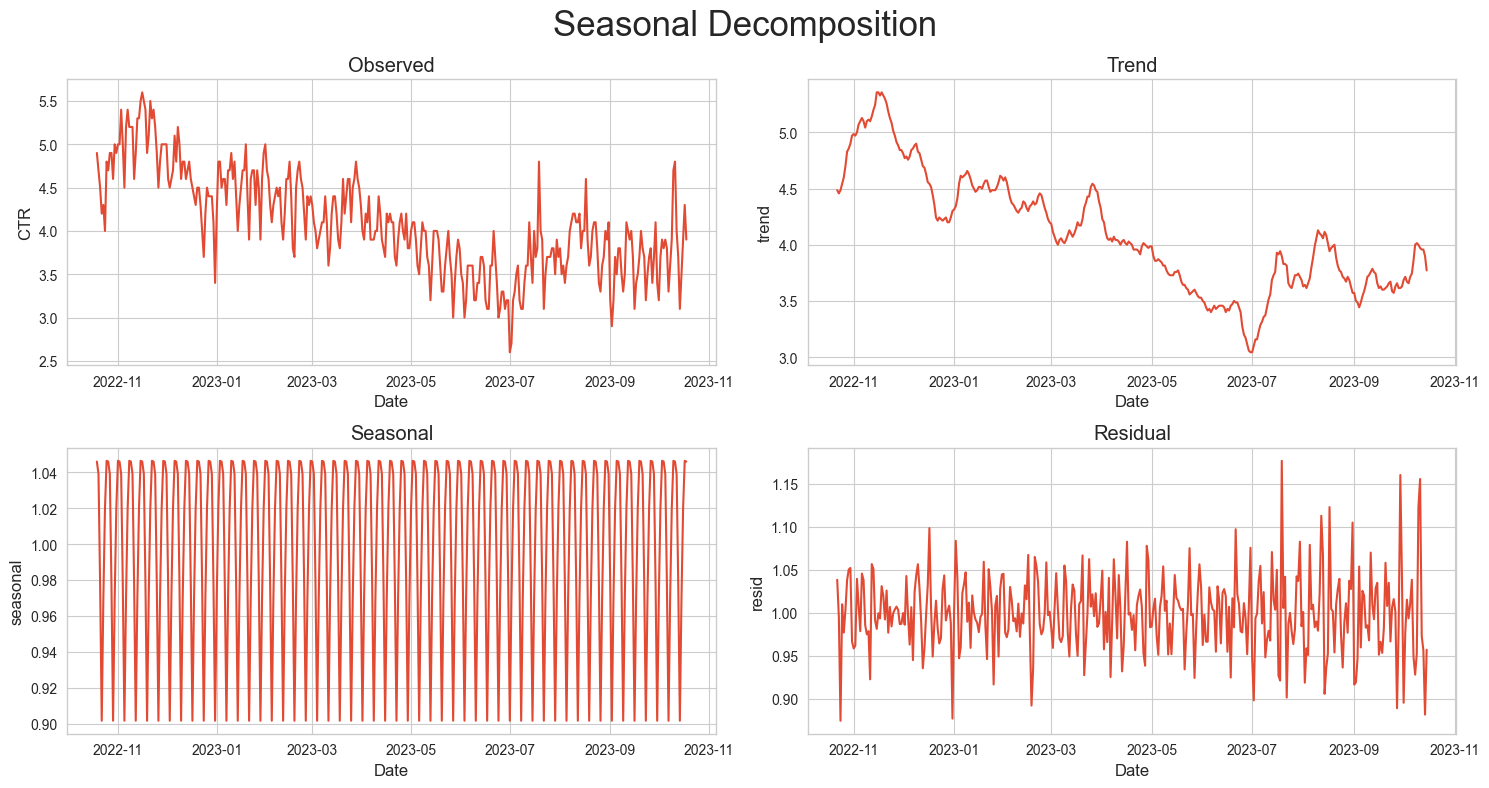

In [119]:
fig , ax  = plt.subplots(2,2, figsize = (15,8))

# Observed 
ax[0,0] = sns.lineplot( ts_decomp.observed , ax = ax[0,0])
ax[0, 0].set_title('Observed') 

# trend component 
sns.lineplot(data=ts_decomp.trend, ax=ax[0, 1]) 
ax[0, 1].set_title('Trend') 

# seasonal component 
sns.lineplot(data=ts_decomp.seasonal, ax=ax[1, 0]) 
ax[1, 0].set_title('Seasonal') 

# residual component 
sns.lineplot(data=ts_decomp.resid, ax=ax[1, 1]) 
ax[1, 1].set_title('Residual')

plt.suptitle("Seasonal Decomposition", size = 25)
plt.tight_layout() 
plt.show()

In [120]:
# Differencing
differenced_series = time_series.diff().dropna()

In [121]:
result = adfuller(differenced_series)

print('ADF Statistic:', result[0]) 
print('p-value:', result[1]) 
print('Critical Values:', result[4]) 

# Interpretation 
if result[1] < 0.05:
    print("The series is stationary") 
else: 
    print("The series is not stationary")

ADF Statistic: -6.148307889529909
p-value: 7.670942052496496e-08
Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}
The series is stationary


#### Now Our Data Becomes Stationary Now We Can Build Our Model Forecasting

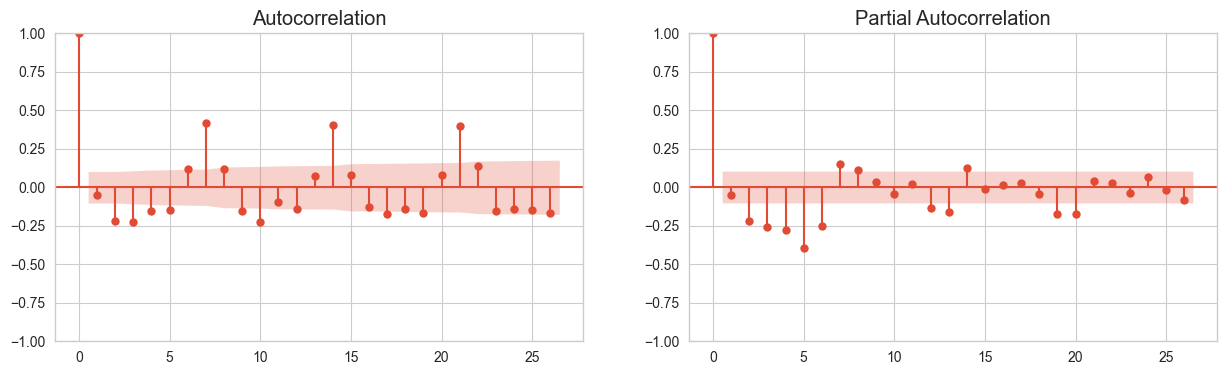

In [123]:
# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [124]:
# The value of p, d, and q will be one here

Now, let’s train the forecasting model using SARIMA:

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings as w
w.filterwarnings('ignore')

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -70.295
Date:                            Wed, 19 Feb 2025   AIC                            150.590
Time:                                    22:41:09   BIC                            169.908
Sample:                                10-19-2022   HQIC                           158.277
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5270      0.071      7.375      0.000       0.387       0.667
ma.L1         -0.9062      0.036   

### Now, here’s how to predict the future CTR values:

In [139]:
# Predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.833121
2023-10-20    3.882811
2023-10-21    3.812917
2023-10-22    3.739637
2023-10-23    3.729922
                ...   
2024-01-22    3.533159
2024-01-23    3.447935
2024-01-24    3.546978
2024-01-25    3.532444
2024-01-26    3.571998
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


Now, let’s visualize the forecasted trend of CTR:

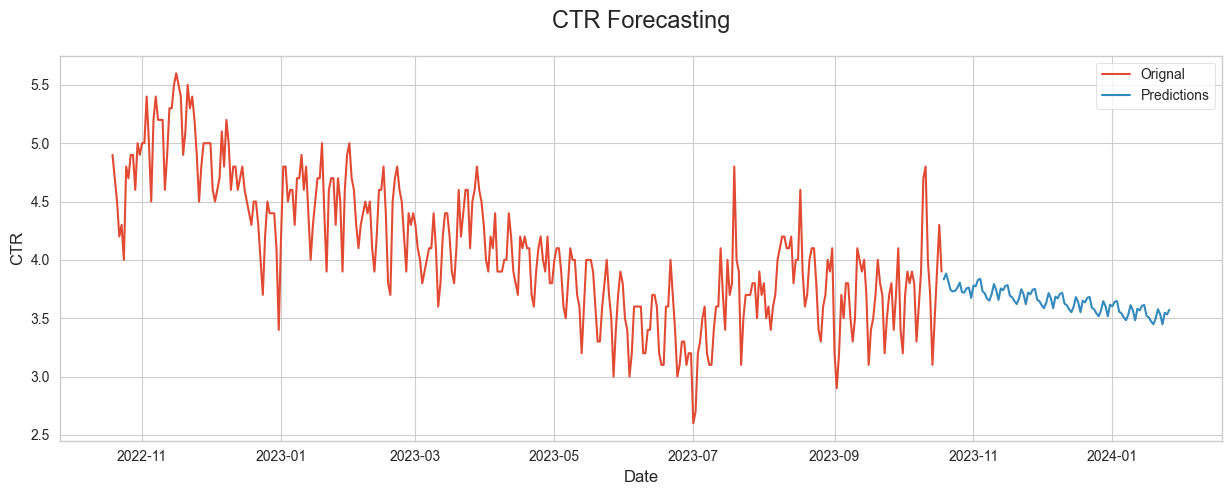

In [144]:
plt.figure( figsize = (15,5))

sns.lineplot( x = time_series.index , y = time_series, label = "Orignal")
sns.lineplot( x = predictions.index , y = predictions, label = "Predictions")

plt.title("CTR Forecasting", size = 17, pad = 20)
plt.show()

### Sumarry

Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance